<a href="https://colab.research.google.com/github/BKT-Com/Section1_porject/blob/main/s1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 배급한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문
2. 연도별 게임의 트렌드가 있을까 라는 질문
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BKT-Com/Section1_porject/main/vgames2.csv')

In [ ]:
'''
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("vgames2.csv")
'''

'\n# 데이터 업로드\nfrom google.colab import files\nuploaded = files.upload()\n\ndf = pd.read_csv("vgames2.csv")\n'

In [ ]:
df_clean = df.copy()
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## **데이터 전처리**

In [ ]:
# 중복 확인
df.duplicated().sum()

0

In [177]:
# 결측치 확인
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [178]:
# 결측치 제거
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
 9   Total_Sales  16241 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [179]:
# 불필요한 컬럼 제거
df = df.iloc[:,1:]
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,DS,2008,Action,Destineer,40,0,0,0,40
1,Wii,2009,Action,Namco Bandai Games,170,0,0,10,180
2,PSP,2010,Adventure,Alchemist,0,0,20,0,20
3,DS,2010,Misc,Zoo Games,40,0,0,0,40
4,PS3,2010,Platform,D3Publisher,120,90,0,40,250
...,...,...,...,...,...,...,...,...,...
16236,GC,2006,Platform,Vivendi Games,150,40,0,10,200
16237,PSP,2005,Action,Rising Star Games,10,0,0,0,10
16238,PS3,2015,Sports,Take-Two Interactive,440,190,30,130,790
16239,PSV,2013,Action,Tecmo Koei,50,50,250,30,380


In [180]:
# 년도 컬럼 이상치 전처리
less_20 = df[df.Year < 22 ]
less_00 = df[(df.Year > 21) &(df.Year<100)]

less_20.Year += 2000
less_00.Year += 1900

In [181]:
df.loc[df.Year < 22,'Year' ] = less_20.Year
df.loc[(df.Year > 21) &(df.Year<100),'Year'] = less_00.Year

In [182]:
df.Year.describe()

count    16241.000000
mean      2006.406748
std          5.832087
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [183]:
# 년도 컬럼 정수로 변경
df.Year = df.Year.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Platform     16241 non-null  object
 1   Year         16241 non-null  int64 
 2   Genre        16241 non-null  object
 3   Publisher    16241 non-null  object
 4   NA_Sales     16241 non-null  object
 5   EU_Sales     16241 non-null  object
 6   JP_Sales     16241 non-null  object
 7   Other_Sales  16241 non-null  object
 8   Total_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [184]:
# NA_Sales 컬럼 판매량 수치 M에서 K로 일치 전처리

num_NA_filt = df.loc[~df['NA_Sales'].str.contains('K',na = False) & ~df['NA_Sales'].str.contains('M',na = False),'NA_Sales']
num_NA_filt = (num_NA_filt.astype(float)*1000).astype(int)
df.loc[~df['NA_Sales'].str.contains('K',na = False) & ~df['NA_Sales'].str.contains('M',na = False),'NA_Sales'] = num_NA_filt

M_NA_filt = df.loc[df['NA_Sales'].str.contains('M',na = False),'NA_Sales']
M_NA_filt = (M_NA_filt.str.replace('M','').astype(float)*1000).astype(int)
df.loc[df['NA_Sales'].str.contains('M',na = False),'NA_Sales'] = M_NA_filt

K_NA_filt = df.loc[df['NA_Sales'].str.contains('K',na = False),'NA_Sales']
K_NA_filt = K_NA_filt.str.replace('K','').astype(int)
df.loc[df['NA_Sales'].str.contains('K',na = False),'NA_Sales'] = K_NA_filt


AttributeError: ignored

In [ ]:
# EU_Sales 컬럼 판매량 수치 M에서 K로 일치 전처리

num_EU_filt = df.loc[~df['EU_Sales'].str.contains('K',na = False) & ~df['EU_Sales'].str.contains('M',na = False),'EU_Sales']
num_EU_filt = (num_EU_filt.astype(float)*1000).astype(int)
df.loc[~df['EU_Sales'].str.contains('K',na = False) & ~df['EU_Sales'].str.contains('M',na = False),'EU_Sales'] = num_EU_filt

M_EU_filt = df.loc[df['EU_Sales'].str.contains('M',na = False),'EU_Sales']
M_EU_filt = (M_EU_filt.str.replace('M','').astype(float)*1000).astype(int)
df.loc[df['EU_Sales'].str.contains('M',na = False),'EU_Sales'] = M_EU_filt

K_EU_filt = df.loc[df['EU_Sales'].str.contains('K',na = False),'EU_Sales']
K_EU_filt = K_EU_filt.str.replace('K','').astype(int)
df.loc[df['EU_Sales'].str.contains('K',na = False),'EU_Sales'] = K_EU_filt


In [ ]:
# JP_Sales 컬럼 판매량 수치 M에서 K로 일치 전처리

num_JP_filt = df.loc[~df['JP_Sales'].str.contains('K',na = False) & ~df['JP_Sales'].str.contains('M',na = False),'JP_Sales']
num_JP_filt = (num_JP_filt.astype(float)*1000).astype(int)
df.loc[~df['JP_Sales'].str.contains('K',na = False) & ~df['JP_Sales'].str.contains('M',na = False),'JP_Sales'] = num_JP_filt

M_JP_filt = df.loc[df['JP_Sales'].str.contains('M',na = False),'JP_Sales']
M_JP_filt = (M_JP_filt.str.replace('M','').astype(float)*1000).astype(int)
df.loc[df['JP_Sales'].str.contains('M',na = False),'JP_Sales'] = M_JP_filt

K_JP_filt = df.loc[df['JP_Sales'].str.contains('K',na = False),'JP_Sales']
K_JP_filt = K_JP_filt.str.replace('K','').astype(int)
df.loc[df['JP_Sales'].str.contains('K',na = False),'JP_Sales'] = K_JP_filt


In [ ]:
# Other_Sales 컬럼 판매량 수치 M에서 K로 일치 전처리

num_EX_filt = df.loc[~df['Other_Sales'].str.contains('K',na = False) & ~df['Other_Sales'].str.contains('M',na = False),'Other_Sales']
num_EX_filt = (num_EX_filt.astype(float)*1000).astype(int)
df.loc[~df['Other_Sales'].str.contains('K',na = False) & ~df['Other_Sales'].str.contains('M',na = False),'Other_Sales'] = num_EX_filt

M_EX_filt = df.loc[df['Other_Sales'].str.contains('M',na = False),'Other_Sales']
M_EX_filt = (M_EX_filt.str.replace('M','').astype(float)*1000).astype(int)
df.loc[df['Other_Sales'].str.contains('M',na = False),'Other_Sales'] = M_EX_filt

K_EX_filt = df.loc[df['Other_Sales'].str.contains('K',na = False),'Other_Sales']
K_EX_filt = K_EX_filt.str.replace('K','').astype(int)
df.loc[df['Other_Sales'].str.contains('K',na = False),'Other_Sales'] = K_EX_filt

In [ ]:
df

In [ ]:
# 장르별 지역 판매량 데이터 총합

Genre_Sales['NA_Sales'] = df.groupby('Genre')['NA_Sales'].sum()
Genre_Sales['EU_Sales'] = df.groupby('Genre')['EU_Sales'].sum()
Genre_Sales['JP_Sales'] = df.groupby('Genre')['JP_Sales'].sum()
Genre_Sales['Other_Sales'] = df.groupby('Genre')['Other_Sales'].sum()

In [ ]:
Genre_Sales

Text(0.5, 1.0, 'NA_Sales')

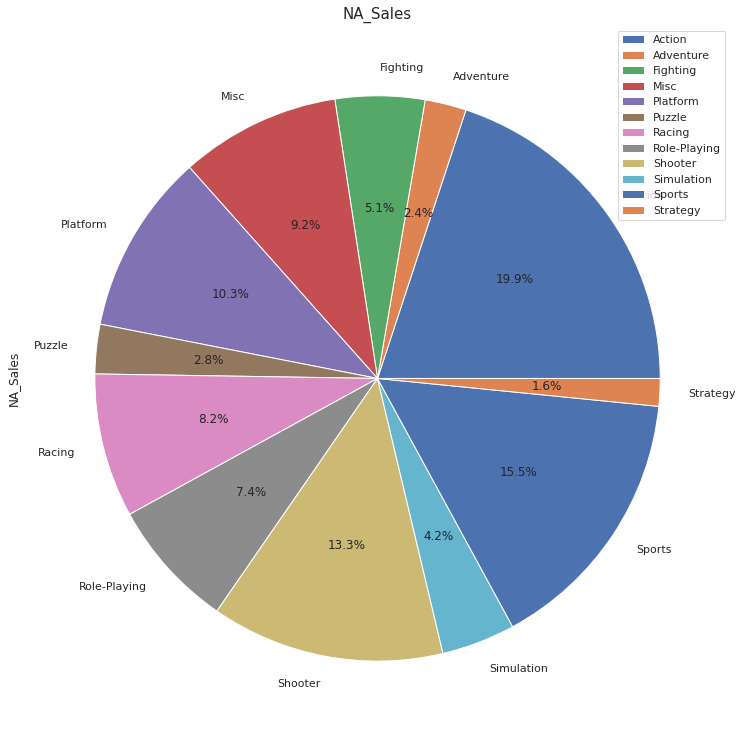

In [ ]:
Genre_Sales.NA_Sales.plot(kind='pie',figsize=(17,13), autopct='%1.1f%%')
plt.legend(Genre_Sales.index, loc='best')
plt.title('NA_Sales',size =15)

Text(0.5, 1.0, 'EU_Sales')

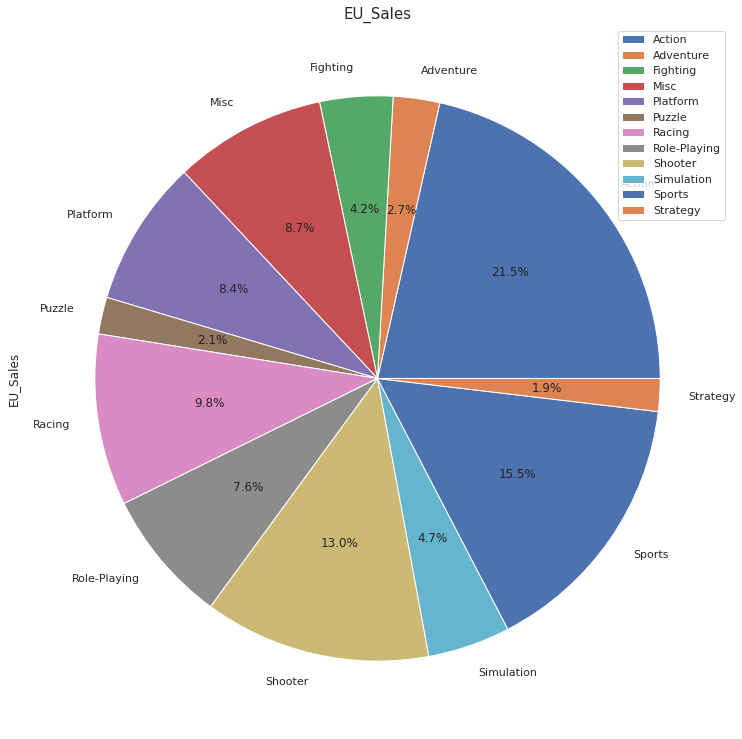

In [ ]:
Genre_Sales.EU_Sales.plot(kind='pie',figsize=(17,13), autopct='%1.1f%%')
plt.legend(Genre_Sales.index, loc='best')
plt.title('EU_Sales',size =15)

Text(0.5, 1.0, 'JP_Sales')

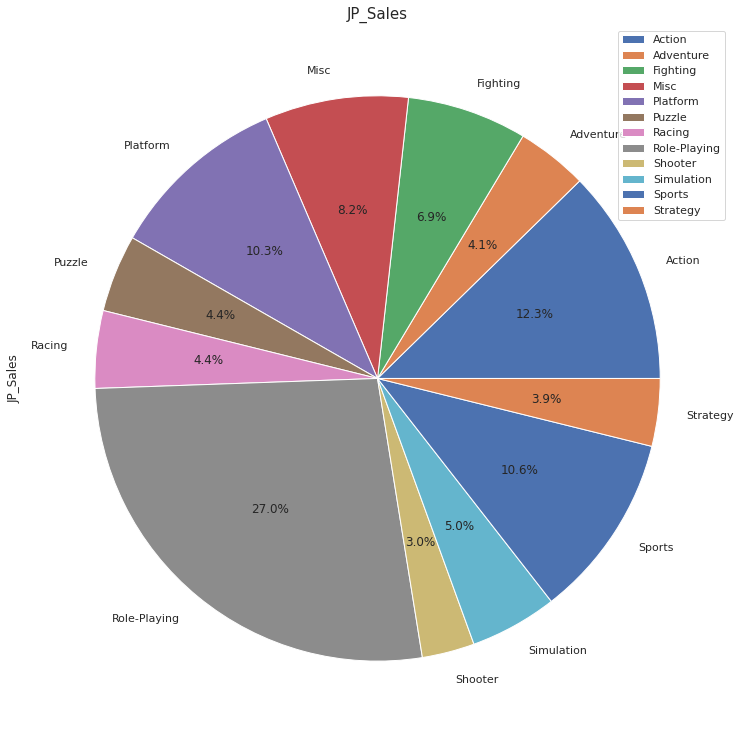

In [ ]:
Genre_Sales.JP_Sales.plot(kind='pie',figsize=(17,13), autopct='%1.1f%%')
plt.legend(Genre_Sales.index, loc='best')
plt.title('JP_Sales',size =15)

Text(0.5, 1.0, 'Other_Sales')

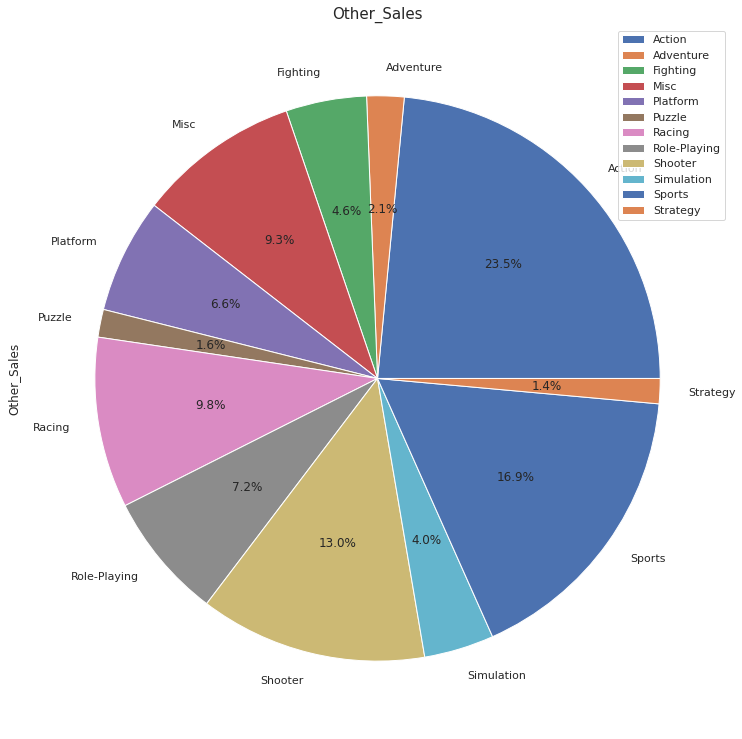

In [ ]:
Genre_Sales.Other_Sales.plot(kind='pie',figsize=(17,13), autopct='%1.1f%%')
plt.legend(Genre_Sales.index, loc='best')
plt.title('Other_Sales',size =15)

In [ ]:
# 총합 판매량 컬럼 추가
df['Total_Sales']= df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

Text(0.5, 1.0, 'Total_Sales')

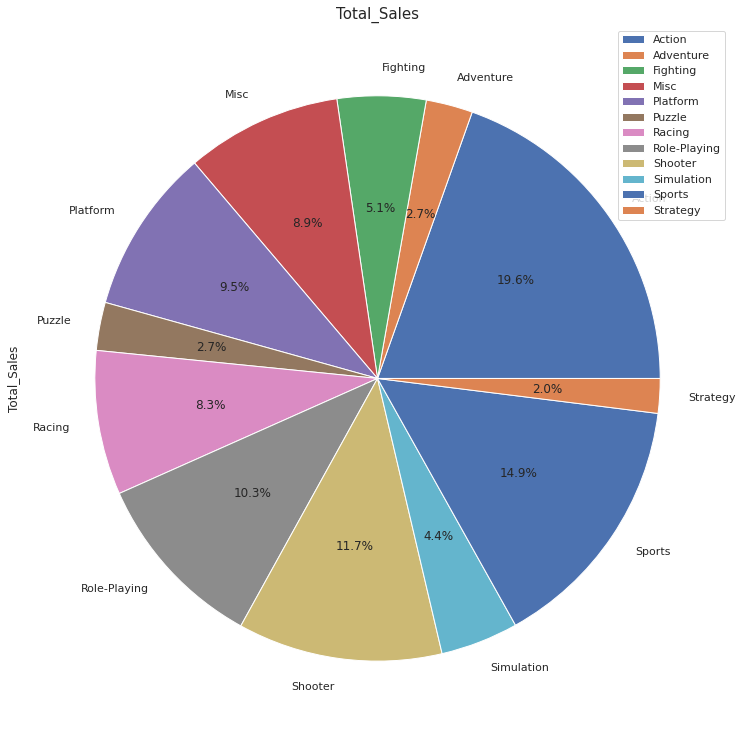

In [188]:
Genre_Sales['Total_Sales'] = df.groupby('Genre')['Total_Sales'].sum()
Genre_Sales.Total_Sales.plot(kind='pie',figsize=(17,13), autopct='%1.1f%%')
plt.legend(Genre_Sales.index, loc='best')
plt.title('Total_Sales',size =15)

In [189]:
# 연도,장르별 판매량 총합 시각화

Year_Old = df.query("Year < 1990")
Year_90 = df.query("(Year >= 1990) and (Year < 2000)")
Year_00 = df.query("(Year >= 2000) and (Year < 2010)")
Year_New = df.query("Year >= 2010")

test = df.query("Year == 2006")
test

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14,DS,2006,Role-Playing,Tomy Corporation,0,0,20,0,20
31,X360,2006,Shooter,Microsoft Game Studios,120,10,20,10,160
38,XB,2006,Sports,Electronic Arts,180,50,0,10,240
58,PS2,2006,Sports,Activision,20,20,0,10,50
111,PS2,2006,Shooter,SouthPeak Games,40,30,0,10,80
...,...,...,...,...,...,...,...,...,...
16182,PS2,2006,Simulation,Konami Digital Entertainment,0,0,30,0,30
16194,GBA,2006,Role-Playing,Konami Digital Entertainment,200,80,0,10,290
16218,PSP,2006,Role-Playing,Sony Computer Entertainment,110,0,0,0,110
16228,DS,2006,Shooter,Eidos Interactive,60,0,0,0,60


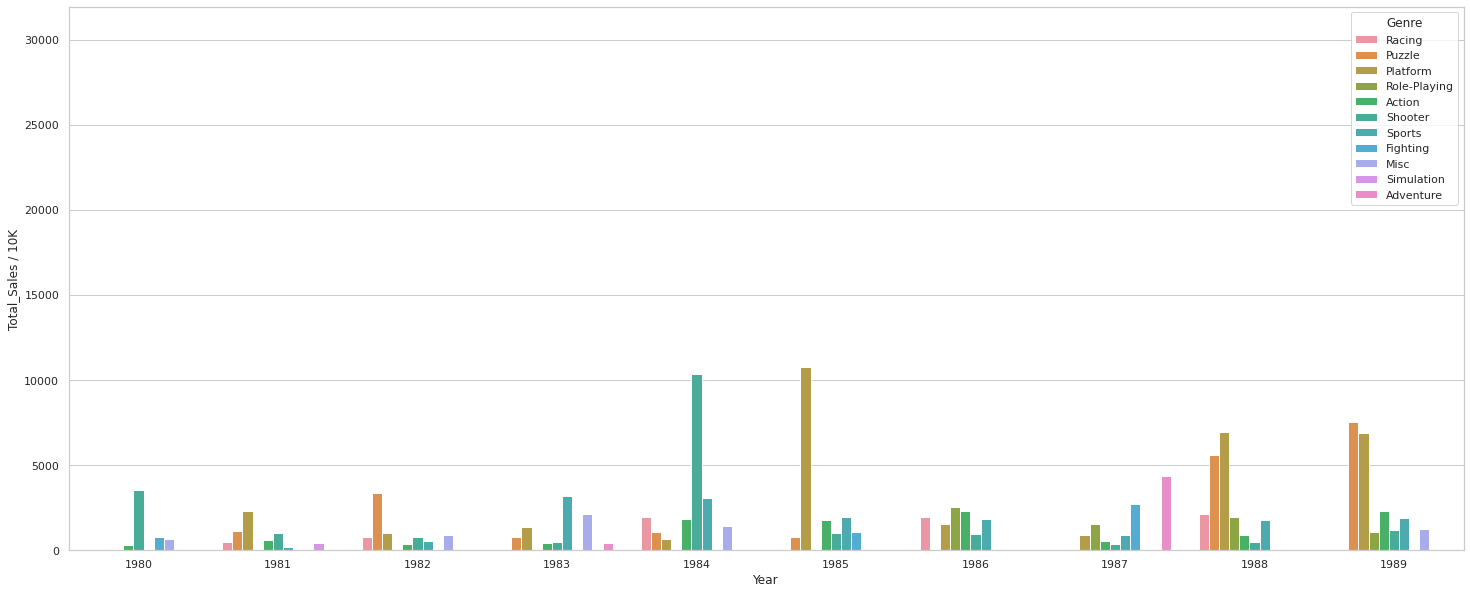

In [190]:
# 90년대 이전 장르별 판매량
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Total_Sales", hue="Genre", data=Year_Old, errwidth=0 )
plt.xlabel("Year")
plt.ylabel("Total_Sales / 10K")
rcParams['figure.figsize'] = 25,10
plt.show()

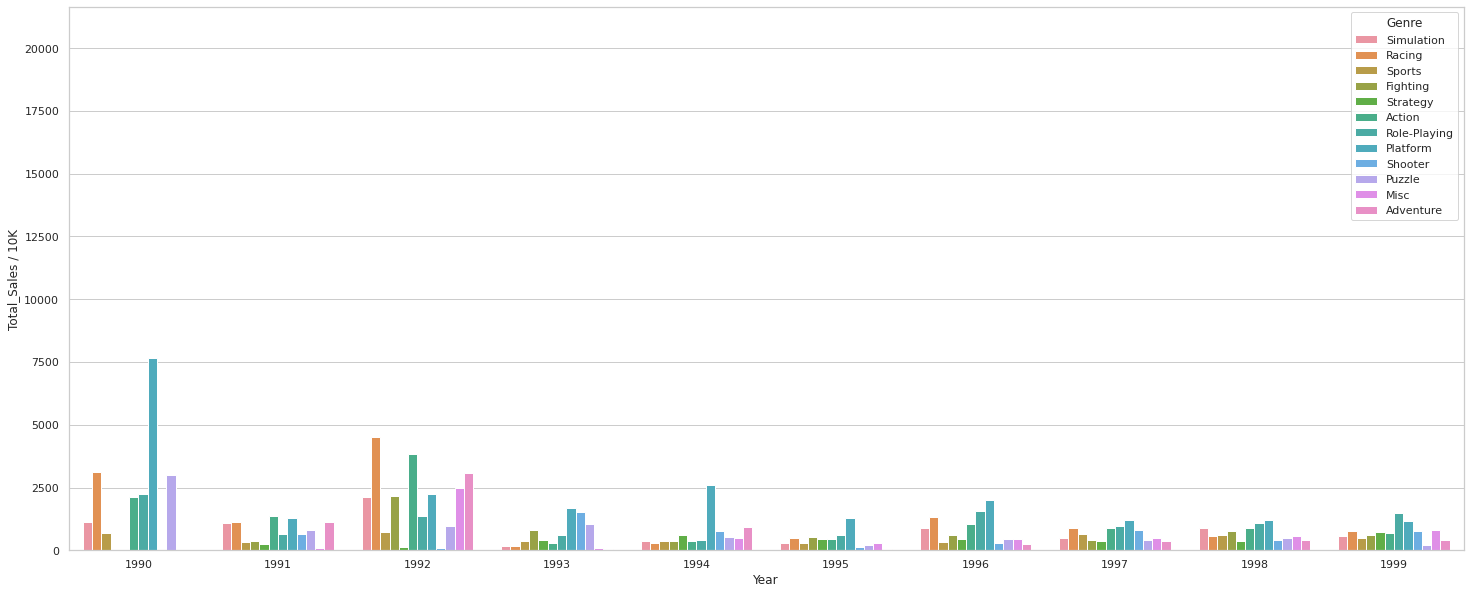

In [191]:
# 90년대 장르별 판매량
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Total_Sales", hue="Genre", data=Year_90, errwidth=0 )
plt.xlabel("Year")
plt.ylabel("Total_Sales / 10K")
rcParams['figure.figsize'] = 25,10
plt.show()

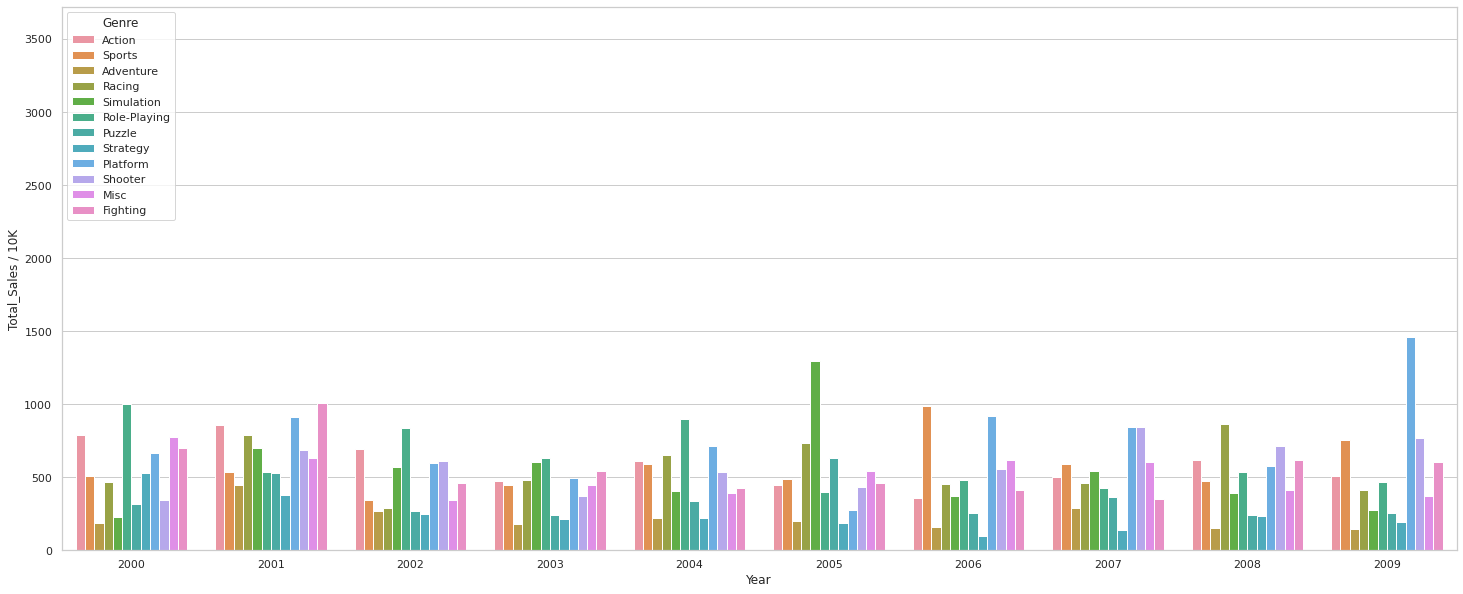

In [192]:
# 00년대 장르별 판매량
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Total_Sales", hue="Genre", data=Year_00, errwidth=0 )
plt.xlabel("Year")
plt.ylabel("Total_Sales / 10K")
rcParams['figure.figsize'] = 25,10
plt.show()

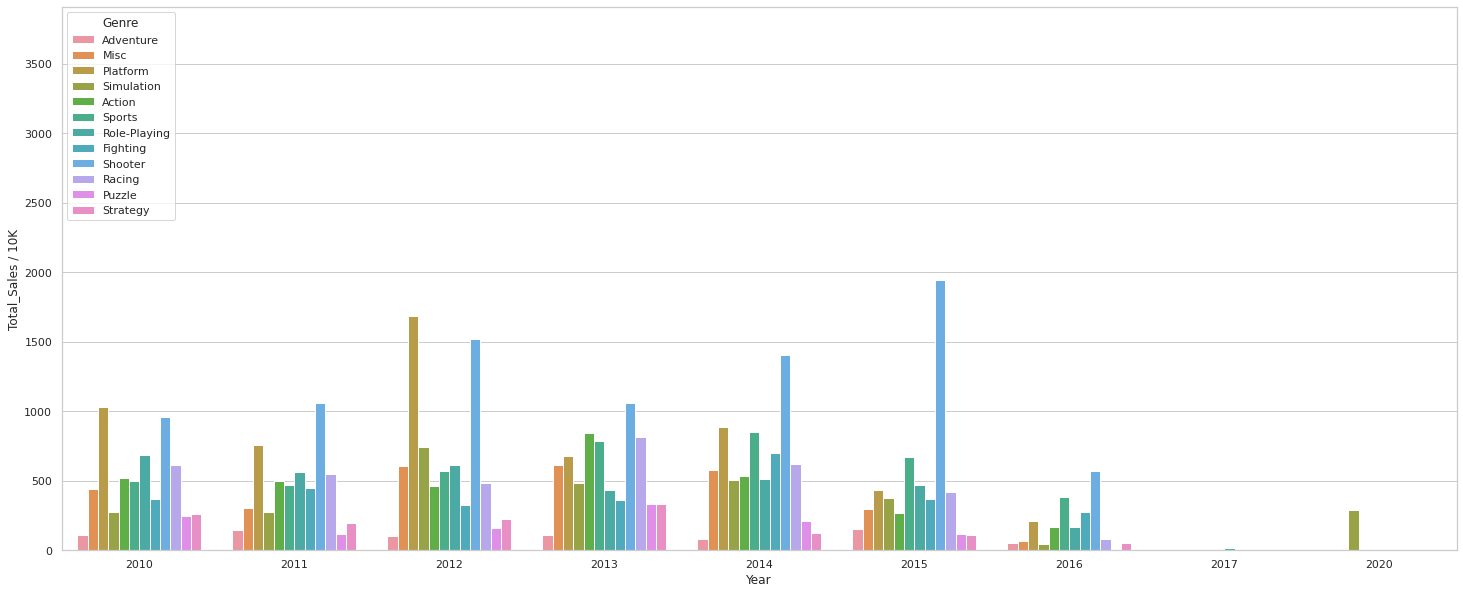

In [193]:
# 10년대이후 장르별 판매량
sns.set_theme(style="whitegrid")
sns.barplot(x="Year", y="Total_Sales", hue="Genre", data=Year_New, errwidth=0 )
plt.xlabel("Year")
plt.ylabel("Total_Sales / 10K")
rcParams['figure.figsize'] = 25,10
plt.show()

In [194]:
# 종합 판매량 순위 정렬
df.sort_values(by=['Total_Sales'],ascending=False).head()


,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii,2006,Sports,Nintendo,41490,29020,3770,8460,82740
4113,NES,1985,Platform,Nintendo,29080,3580,6810,770,40240
12316,Wii,2008,Racing,Nintendo,15850,12880,3790,3310,35830
3288,Wii,2009,Sports,Nintendo,15750,11010,3280,2960,33000
7673,GB,1996,Role-Playing,Nintendo,11270,8890,10220,1000,31380


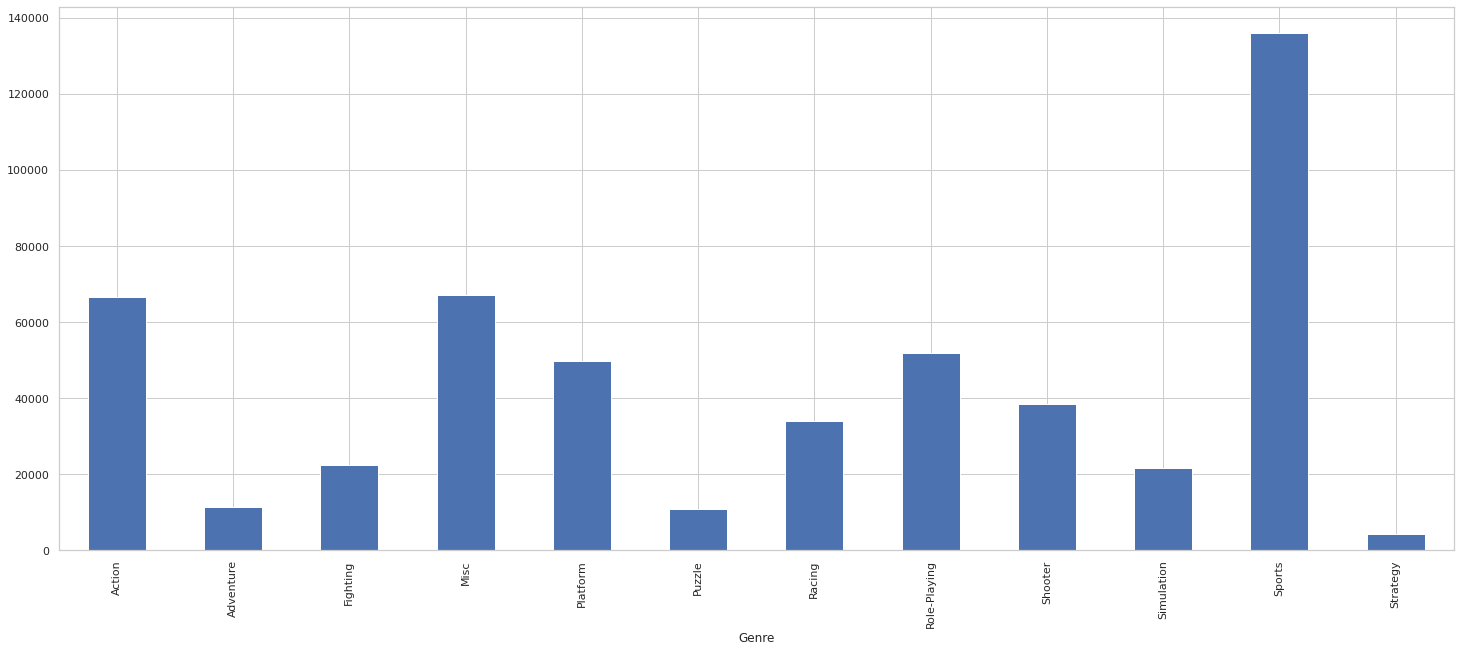

In [195]:
# 2006년도 판매량 시각화
Sales_2006 = df.query('Year == 2006')

genre_2006 = Sales_2006.groupby('Genre')['Total_Sales'].sum()
genre_2006.plot(kind='bar')


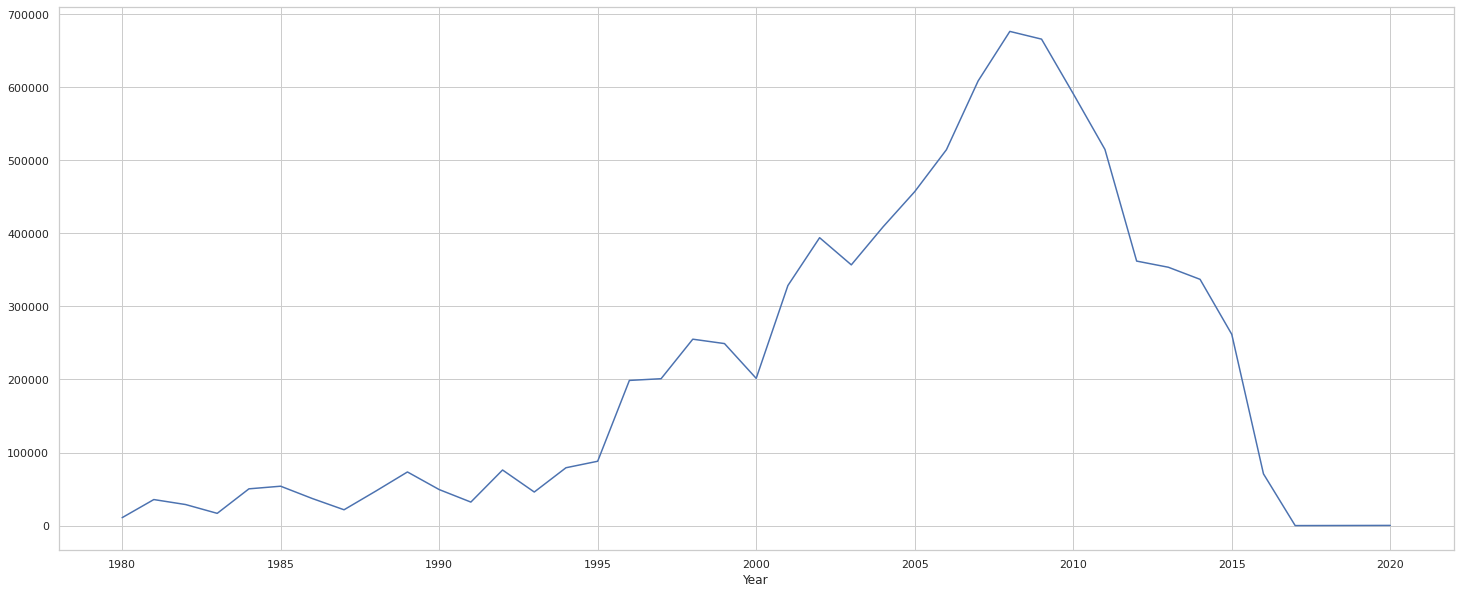

In [196]:
# 연도별 게임 판매량 변화
year_flow = df.groupby('Year')['Total_Sales'].sum()
year_flow
year_flow.plot(kind='line')